# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# Memuat dataset
data = pd.read_csv('/content/Dataset_inisiasi.csv')  # Path sesuai lokasi file
data.head()  # Menampilkan 5 baris pertama untuk melihat struktur dataset

,nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,5.75,ACEH
1,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,5.24,SUMATERA UTARA
2,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,5.90,SUMATERA BARAT
3,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,4.25,RIAU
4,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,4.50,JAMBI


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nama_variabel                1435 non-null   object 
 1   nama_variabel_turunan        1435 non-null   object 
 2   nama_tahun                   1435 non-null   int64  
 3   nama_turunan_tahun           1435 non-null   object 
 4   data_content                 1435 non-null   float64
 5   nama_item_vertical_variabel  1435 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 67.4+ KB
None
        nama_tahun  data_content
count  1435.000000   1435.000000
mean   2018.609756     49.923482
std       2.368061     37.758063
min    2015.000000      0.880000
25%    2017.000000      6.900000
50%    2019.000000     59.310000
75%    2021.000000     87.410000
max    2023.000000     99.450000


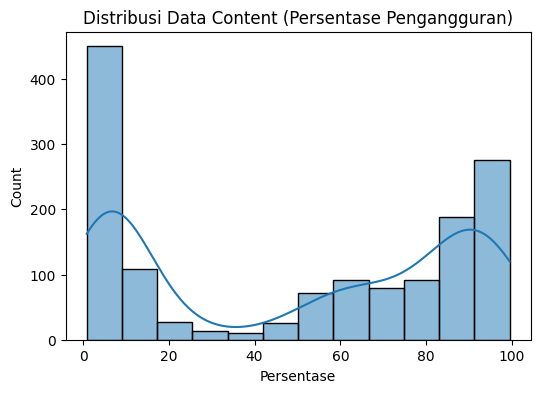

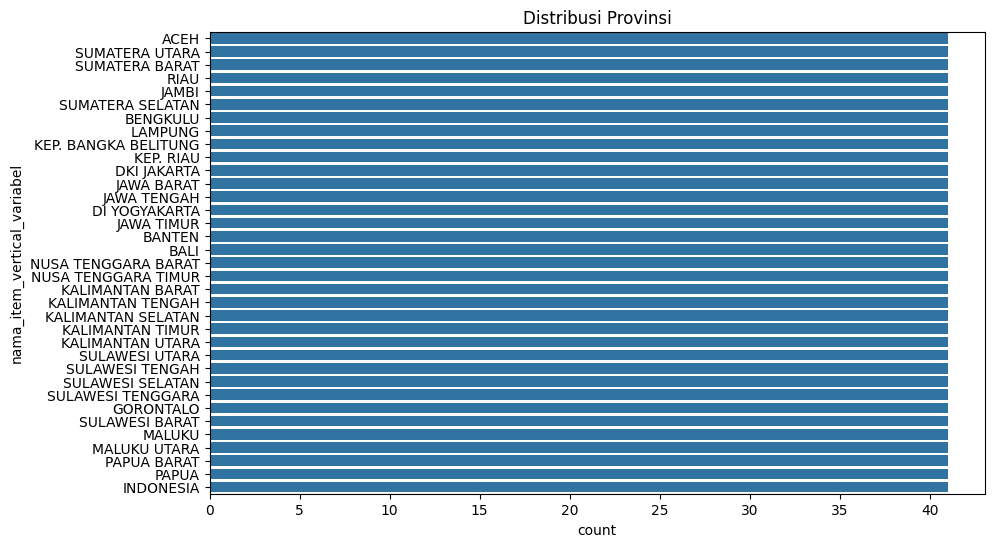

Missing values per column:
nama_variabel                  0
nama_variabel_turunan          0
nama_tahun                     0
nama_turunan_tahun             0
data_content                   0
nama_item_vertical_variabel    0
dtype: int64


In [5]:
# Memahami struktur data
print(data.info())
print(data.describe())

# Visualisasi distribusi data numerikal
plt.figure(figsize=(6, 4))
sns.histplot(data['data_content'], kde=True)
plt.title('Distribusi Data Content (Persentase Pengangguran)')
plt.xlabel('Persentase')
plt.show()

# Visualisasi data kategorikal (Provinsi)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['nama_item_vertical_variabel'])
plt.title('Distribusi Provinsi')
plt.show()

# Cek missing values
print("Missing values per column:")
print(data.isnull().sum())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [6]:
# Mengubah kolom numerikal menjadi angka dan menangani error
data['data_content'] = pd.to_numeric(data['data_content'], errors='coerce')

# Menghapus baris dengan nilai kosong
data = data.dropna()

# Pastikan semua nilai kosong telah dihapus
print("Jumlah nilai kosong per kolom setelah dropna:")
print(data.isnull().sum())

Jumlah nilai kosong per kolom setelah dropna:
nama_variabel                  0
nama_variabel_turunan          0
nama_tahun                     0
nama_turunan_tahun             0
data_content                   0
nama_item_vertical_variabel    0
dtype: int64


In [7]:
# Menghapus duplikasi
data = data.drop_duplicates()

# Periksa apakah ada duplikasi yang tersisa
print("Jumlah data setelah menghapus duplikasi:", data.shape[0])

Jumlah data setelah menghapus duplikasi: 1435


In [8]:
from sklearn.preprocessing import StandardScaler

# Standarisasi kolom numerikal
scaler = StandardScaler()
data['data_content_scaled'] = scaler.fit_transform(data[['data_content']])

In [9]:
# Menggunakan IQR untuk mendeteksi outlier pada kolom numerikal
Q1 = data['data_content'].quantile(0.25)
Q3 = data['data_content'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
data = data[(data['data_content'] >= lower_bound) & (data['data_content'] <= upper_bound)]
print("Jumlah data setelah menghapus outlier:", data.shape[0])

Jumlah data setelah menghapus outlier: 1435


In [10]:
# One-hot encoding untuk kolom kategorikal
data_encoded = pd.get_dummies(data, columns=['nama_item_vertical_variabel', 'nama_turunan_tahun'])

# Tampilkan kolom hasil encoding
print("Kolom setelah encoding:", data_encoded.columns)

Kolom setelah encoding: Index(['nama_variabel', 'nama_variabel_turunan', 'nama_tahun', 'data_content',
       'data_content_scaled', 'nama_item_vertical_variabel_ACEH',
       'nama_item_vertical_variabel_BALI',
       'nama_item_vertical_variabel_BANTEN',
       'nama_item_vertical_variabel_BENGKULU',
       'nama_item_vertical_variabel_DI YOGYAKARTA',
       'nama_item_vertical_variabel_DKI JAKARTA',
       'nama_item_vertical_variabel_GORONTALO',
       'nama_item_vertical_variabel_INDONESIA',
       'nama_item_vertical_variabel_JAMBI',
       'nama_item_vertical_variabel_JAWA BARAT',
       'nama_item_vertical_variabel_JAWA TENGAH',
       'nama_item_vertical_variabel_JAWA TIMUR',
       'nama_item_vertical_variabel_KALIMANTAN BARAT',
       'nama_item_vertical_variabel_KALIMANTAN SELATAN',
       'nama_item_vertical_variabel_KALIMANTAN TENGAH',
       'nama_item_vertical_variabel_KALIMANTAN TIMUR',
       'nama_item_vertical_variabel_KALIMANTAN UTARA',
       'nama_item_vertical_v

In [11]:
# Membuat binning pada 'data_content_scaled' menjadi 3 kategori
data['content_category'] = pd.cut(data['data_content_scaled'], bins=3, labels=['Low', 'Medium', 'High'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [12]:
from sklearn.cluster import KMeans

# Pastikan hanya menggunakan kolom numerikal
numerical_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_clustering = data_encoded[numerical_columns]

# Periksa apakah ada nilai NaN di data clustering
print("Jumlah nilai NaN di data clustering:", data_clustering.isnull().sum().sum())

# Jalankan model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_clustering)

# Tampilkan hasil cluster
print("Cluster labels telah ditambahkan ke dataset.")
data.head()


Jumlah nilai NaN di data clustering: 0
Cluster labels telah ditambahkan ke dataset.


,nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel,data_content_scaled,content_category,Cluster
0,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,5.75,ACEH,-1.170316,Low,2
1,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,5.24,SUMATERA UTARA,-1.183828,Low,2
2,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,5.90,SUMATERA BARAT,-1.166342,Low,2
3,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,4.25,RIAU,-1.210057,Low,2
4,Tingkat Pengangguran Terbuka Menurut Provinsi,Tidak Ada,2023,Februari,4.50,JAMBI,-1.203434,Low,2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [13]:
from sklearn.metrics import silhouette_score

# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(data_clustering, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.75


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [14]:
from sklearn.feature_selection import mutual_info_classif

# Mengidentifikasi fitur penting
features = numerical_columns
mutual_info = mutual_info_classif(data_clustering, data['Cluster'])
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Tampilkan fitur penting
print("Fitur yang paling berpengaruh terhadap clustering:")
print(feature_importance)

Fitur yang paling berpengaruh terhadap clustering:
               Feature  Importance
1         data_content    1.048596
2  data_content_scaled    1.048596
0           nama_tahun    0.019168


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

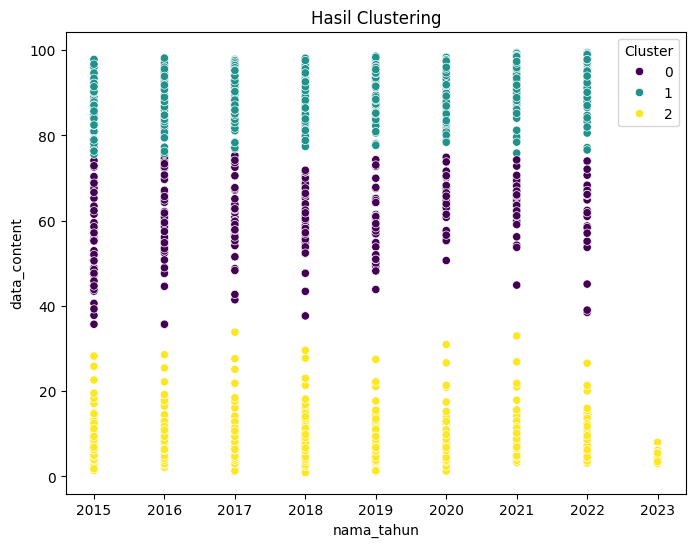

<ipython-input-15-2e02ab117216>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Cluster'], palette='viridis')


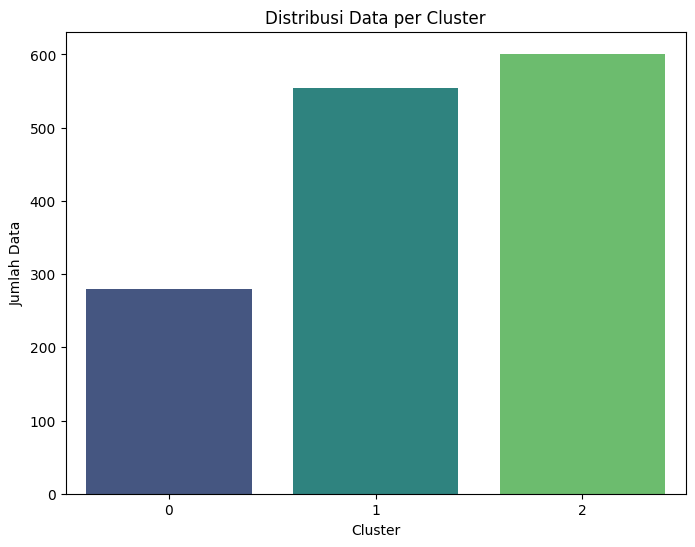

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi scatter plot (gunakan dua kolom numerikal utama)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_clustering[numerical_columns[0]],
    y=data_clustering[numerical_columns[1]],
    hue=data['Cluster'],
    palette='viridis'
)
plt.title('Hasil Clustering')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.legend(title='Cluster')
plt.show()

# Visualisasi distribusi jumlah data per cluster
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Cluster'], palette='viridis')
plt.title('Distribusi Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [16]:
# Hitung rata-rata untuk tiap cluster
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Rata-rata 'data_content': {cluster_data['data_content'].mean():.2f}")
    print(f"Provinsi Dominan: {cluster_data['nama_item_vertical_variabel'].mode()[0]}")


Cluster 0:
Rata-rata 'data_content': 60.65
Provinsi Dominan: PAPUA

Cluster 1:
Rata-rata 'data_content': 90.04
Provinsi Dominan: DI YOGYAKARTA

Cluster 2:
Rata-rata 'data_content': 7.95
Provinsi Dominan: PAPUA


Tulis hasil interpretasinya di sini.
1. Cluster 0:
	* Rata-rata data_content: 60.65
	* Provinsi yang Paling Sering Muncul: Papua
	* Penjelasan: Cluster ini mencakup daerah dengan tingkat data_content yang cukup tinggi dan stabil. Papua menjadi provinsi yang dominan karena memiliki nilai data_content yang sering muncul dalam kategori ini.

2. Cluster 1:
	* Rata-rata data_content: 90.04
	* Provinsi yang Paling Sering Muncul: DI Yogyakarta
	* Penjelasan: Cluster ini terdiri dari wilayah dengan data_content yang sangat tinggi. DI Yogyakarta menjadi yang paling dominan karena sering muncul dalam kelompok ini.

3. Cluster 2:
	* Rata-rata data_content: 7.95
	* Provinsi yang Paling Sering Muncul: Papua
	* Penjelasan: Cluster ini berisi wilayah dengan data_content yang sangat rendah. Meskipun memiliki rata-rata yang kecil, Papua tetap mendominasi karena kemungkinan memiliki distribusi data_content yang tersebar di berbagai kategori.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [17]:
# Menyimpan dataset dengan hasil clustering ke file CSV
data.to_csv('Dataset_clustering.csv', index=False)
print("Hasil clustering telah diekspor ke file 'Dataset_clustering.csv'.")

Hasil clustering telah diekspor ke file 'Dataset_clustering.csv'.
